In [13]:

import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data 

In [ ]:
""" 
1
- Null Hypothesis: There is no change in latency since we switched ISPs
- Alt. Hypo: There is some change in latency.
- type 1 error: The conclusion is there is a difference but there actually is not
- Type 2 error: The conclustion is there is no difference but there actually is.

2
- Null Hypo: Visitors to the website spend the same short amount of time as the old crapy website. 
- Alt. Hypo: Visitors spend different amount of time (more)






"""

In [ ]:
#1

In [ ]:
#Is there a difference in grades of students on the second floor compared to grades of all students?:
#One sample T-test two tail 

In [ ]:
#Are adults who drink milk taller than adults who dont drink milk?
#Two sample T-test one tail

In [ ]:
#Is the the price of gas higher in texas or in new mexico?
#Two sample T-test one tail 

In [ ]:
#Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?
#ANOVA

In [ ]:
#2

In [87]:
"""Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices.
A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days.
A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance."""

office1= 90 
office2= 100
alpha= .05

In [88]:
t, p = stats.ttest_ind_from_stats(office1,15, 40, office2,20,50, equal_var=False) 
t, p 

(-2.7091418459143854, 0.00811206270346016)

In [82]:
#the long way to do it:

office1 = stats.norm(90, 15).rvs(40)
office2 = stats.norm(100, 20).rvs(50)

In [83]:
t , p = stats.levene(office1, office2)

In [84]:
t , p = stats.ttest_ind(office1, office2, equal_var=False)

In [89]:
if  (p  < alpha):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

We can reject the null hypothesis


In [ ]:
#3

In [14]:
mpg = data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [19]:
mpg["average_mileage"] = (mpg["hwy"] + mpg['cty']) / 2
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [24]:
mpg2008 = mpg[mpg.year == 2008].average_mileage
mpg1999 = mpg[mpg.year == 1999].average_mileage
mpg1999.shape

(117,)

In [ ]:
#Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

<AxesSubplot:>

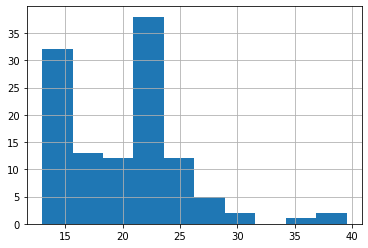

In [21]:
mpg1999.hist()

<AxesSubplot:>

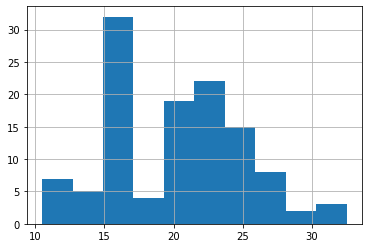

In [22]:
mpg2008.hist()

In [64]:
alpha = .05
mpg1999mean= mpg1999.mean()
mpg2008mean= mpg2008.mean()
mpg1999mean , mpg2008mean

(20.22222222222222, 20.076923076923077)

In [65]:
stat, pval = stats.levene(mpg1999 , mpg2008)
pval #var is equal enough 

0.855517569468803

In [66]:
t, p = stats.ttest_ind(mpg1999, mpg2008)
t, p 


(0.21960177245940962, 0.8263744040323578)

In [67]:
if (t > 0) and ((p / 2) < alpha):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we fail to reject the null hypothesis


In [ ]:
#must except null hypo. Pval is greater than alpha 

In [61]:
mpgCompact = mpg[mpg["class"] == "compact"].average_mileage
mpgTotal = mpg.average_mileage.mean()
mpgTotal, mpgCompact

(20.14957264957265,
 1      23.5
 2      25.0
 3      25.5
 4      25.5
 5      21.0
 6      22.0
 7      22.5
 8      22.0
 9      20.5
 10     24.0
 11     23.0
 12     20.0
 13     21.0
 14     21.0
 15     20.0
 142    25.0
 143    23.0
 170    22.5
 171    23.5
 172    22.0
 173    23.5
 187    24.0
 188    25.0
 189    26.0
 190    26.5
 191    22.0
 192    22.0
 193    22.5
 194    27.0
 195    28.5
 196    30.5
 197    32.5
 198    30.5
 208    25.0
 209    22.5
 210    25.0
 211    25.5
 212    20.5
 213    38.5
 214    25.0
 215    22.5
 216    25.5
 217    25.0
 218    25.0
 219    25.0
 220    19.5
 221    20.5
 Name: average_mileage, dtype: float64)

In [78]:
tstat, pval = stats.ttest_1samp(mpgCompact , mpgTotal)
tstat, pval

(7.896888573132535, 4.1985637943171336e-10)

In [79]:
if (t > 0) and ((pval/2) < alpha):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we fail to reject the null hypothesis


In [ ]:
#we can reject null hypothesis, compact mpg is greater than total avg. Tstat is greater than zero and alpha is less than alpha.

In [45]:
mpg['is_automatic']=mpg.trans.str.contains("auto")
mpg["is_manula"] = mpg.trans.str.contains("manual")
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage,is_automatic,is_manula
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,True,False
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,False,True
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,False,True
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,True,False
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,True,False


In [68]:
mpgAuto = mpg[mpg.is_automatic].average_mileage
mpgManula = mpg[mpg.is_manula].average_mileage
mpgManula

2      25.0
3      25.5
6      22.0
8      22.0
10     24.0
13     21.0
15     20.0
24     21.0
26     21.0
28     19.5
49     17.0
52     15.5
56     14.0
65     14.0
69     14.0
70     10.5
72     13.5
79     17.0
85     15.5
86     14.5
91     22.0
93     21.5
96     18.5
97     19.0
99     17.0
100    30.5
102    28.5
103    26.0
105    30.0
108    25.0
110    22.5
112    26.0
114    22.0
117    24.0
118    24.0
121    20.0
122    20.5
142    25.0
145    27.5
146    23.0
149    22.0
152    16.0
160    21.5
162    23.5
163    22.0
167    22.5
168    22.5
172    22.0
173    23.5
174    17.5
177    16.0
180    25.0
182    26.0
185    22.0
188    25.0
189    26.0
192    22.0
196    30.5
197    32.5
201    17.5
203    19.5
204    16.0
206    16.5
208    25.0
210    25.0
212    20.5
213    38.5
214    25.0
217    25.0
219    25.0
221    20.5
222    39.5
224    25.0
226    24.0
228    25.0
231    25.0
233    22.0
Name: average_mileage, dtype: float64

In [55]:
stat, pval = stats.levene(mpgAuto, mpgManula)
pval #close enough

0.6545276355131857

In [59]:
t, p = stats.ttest_ind(mpgManula, mpgAuto)
t, p

(4.593437735750014, 3.5771872005728416e-06)

In [60]:
if (t > 0) and ((p / 2) < alpha):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

We can reject the null hypothesis


In [ ]:
#we can reject the null hypo. Manual cars get better gas mileage than automatic cars. Tstat is greater than zero and pval is less than alpha.